ML Project

Steps:
1. Get the Data, currently attempting redfin as zillow does not have granularity needed
   - Redfin did not have data at granularity either
   - Using https://www.kaggle.com/datasets/ahmedshahriarsakib/usa-real-estate-dataset for now
3. Explore the Data
4. Clean/Pre Process the Data if needed

5. Attempt Linear regression

Loading Libaries and Creating function to load dataset

In [1]:
import pandas as pd
import os

HOUSING_PATH = "Data"
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "realtor-data.zip.csv")
    return pd.read_csv(csv_path)


Loading Dataset by calling function and peaking at data

In [319]:
housing = load_housing_data()
housing.head()

,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price
0,for_sale,3.0,2.0,0.12,Adjuntas,Puerto Rico,601.0,920.0,NaN,105000.0
1,for_sale,4.0,2.0,0.08,Adjuntas,Puerto Rico,601.0,1527.0,NaN,80000.0
2,for_sale,2.0,1.0,0.15,Juana Diaz,Puerto Rico,795.0,748.0,NaN,67000.0
3,for_sale,4.0,2.0,0.10,Ponce,Puerto Rico,731.0,1800.0,NaN,145000.0
4,for_sale,6.0,2.0,0.05,Mayaguez,Puerto Rico,680.0,NaN,NaN,65000.0


Exploring Data

In [42]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 904966 entries, 0 to 904965
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   status          904966 non-null  object 
 1   bed             775126 non-null  float64
 2   bath            791082 non-null  float64
 3   acre_lot        638324 non-null  float64
 4   city            904894 non-null  object 
 5   state           904966 non-null  object 
 6   zip_code        904762 non-null  float64
 7   house_size      612080 non-null  float64
 8   prev_sold_date  445865 non-null  object 
 9   price           904895 non-null  float64
dtypes: float64(6), object(4)
memory usage: 69.0+ MB


Null Counts:
<br>Bed and Bath (Maybe this is for land sales)
<br>Acre_lot (???)
<br>house size (Just for land sales?)
<br>Prev_sold_date (First time sold?, new contructions)

In [336]:
#Drop all records prices that are null
housing = housing.dropna(subset='price')
housing = housing[housing['state'] ==('New York')]
housing

,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price
30149,for_sale,3.0,1.0,60.00,Berlin,New York,12022.0,1176.0,NaN,175000.0
54248,for_sale,3.0,2.0,2.02,Claverack,New York,12521.0,1600.0,2021-11-24,425000.0
54258,for_sale,4.0,2.0,0.24,Copake,New York,12521.0,1239.0,2018-02-01,225000.0
54259,for_sale,3.0,3.0,1.90,Copake,New York,12516.0,1800.0,NaN,419000.0
54262,for_sale,3.0,2.0,2.00,Copake,New York,12517.0,1482.0,NaN,365000.0
...,...,...,...,...,...,...,...,...,...,...
904961,for_sale,2.0,2.0,NaN,New York City,New York,10463.0,NaN,2021-08-13,359000.0
904962,for_sale,2.0,2.0,NaN,Bronx,New York,10463.0,1200.0,NaN,299000.0
904963,for_sale,NaN,1.0,NaN,Bronx,New York,10463.0,NaN,NaN,120000.0
904964,for_sale,3.0,2.0,NaN,Bronx,New York,10463.0,NaN,NaN,449000.0


Zip Code - Dimensional Data, therefore mean, std, etc doesn't make sense
<br>Bed & Bath - Max values seem strange




# Plotting the data

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt

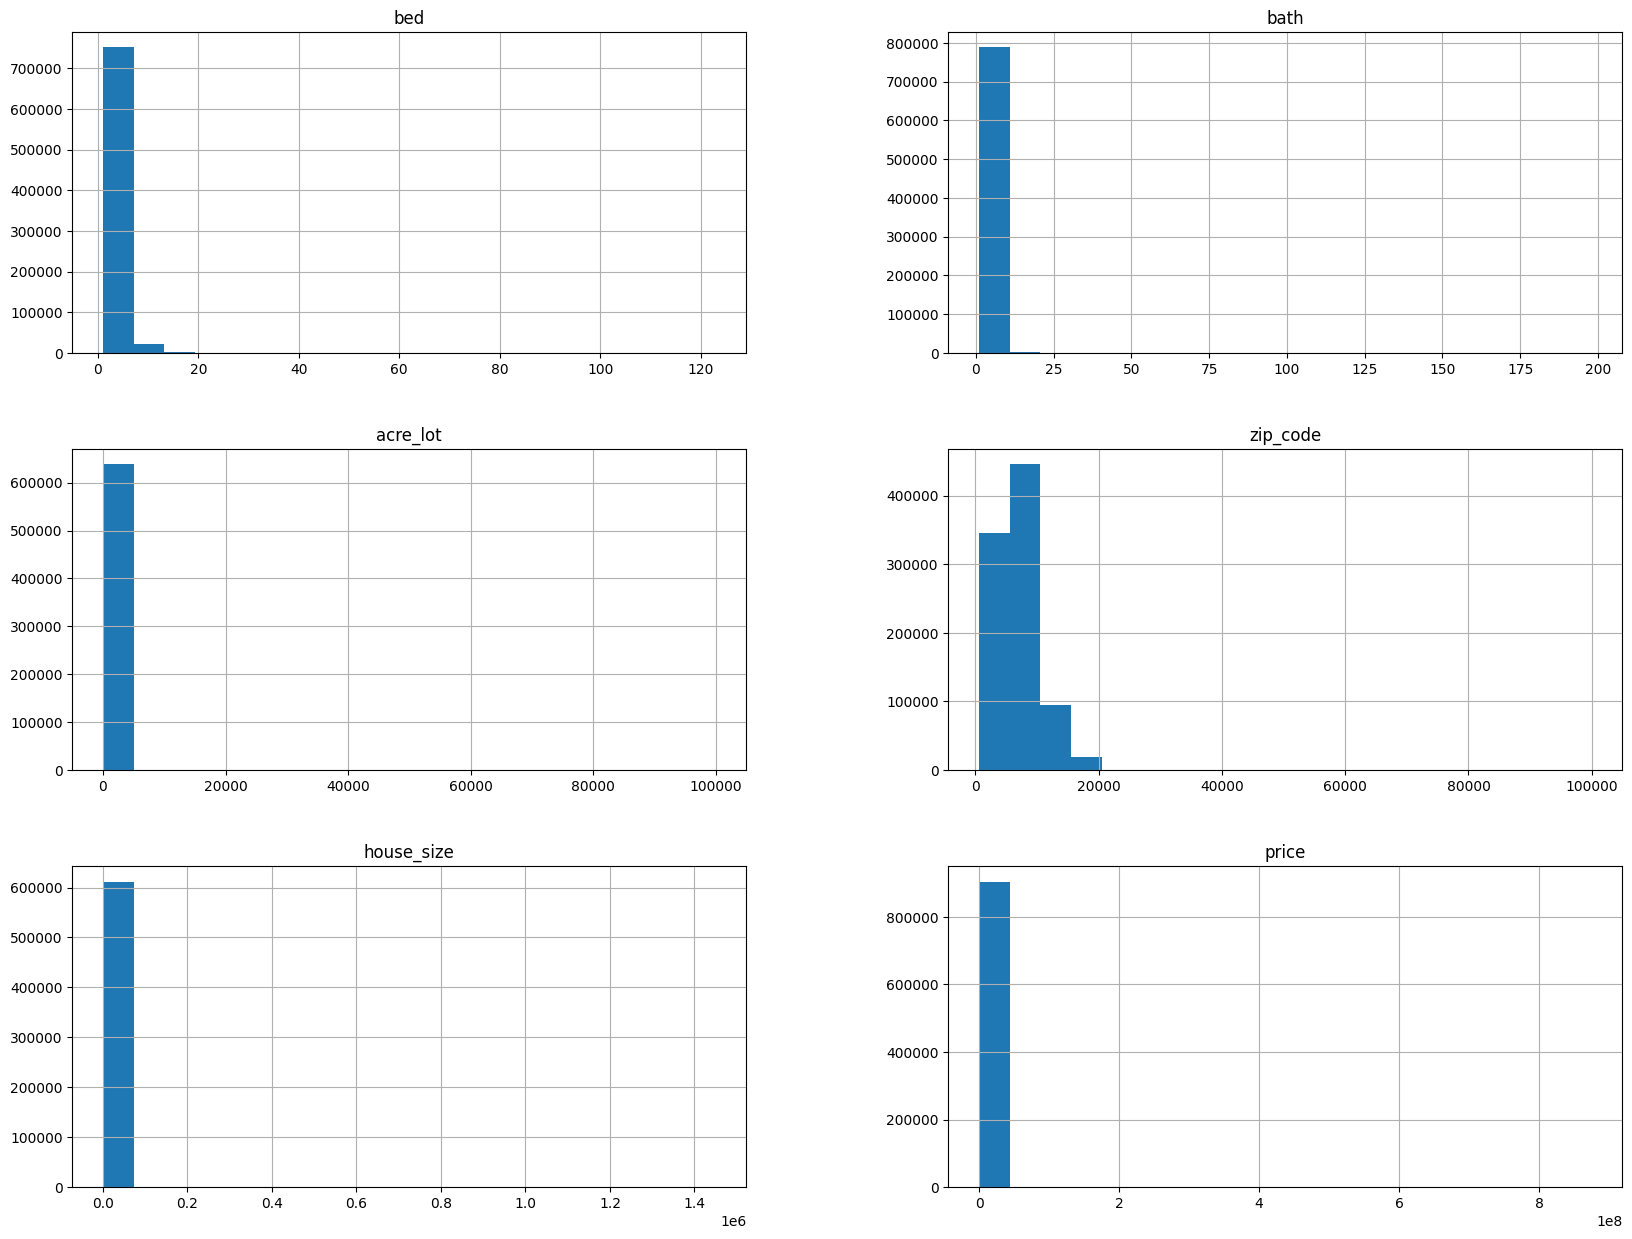

In [44]:

housing.hist(bins=20, figsize=(20,15))
plt.show()

In [337]:
import numpy as np
def split_train_test(data, test_ratio):
 shuffled_indices = np.random.permutation(len(data))
 test_set_size = int(len(data) * test_ratio)
 test_indices = shuffled_indices[:test_set_size]
 train_indices = shuffled_indices[test_set_size:]
 return data.iloc[train_indices], data.iloc[test_indices]

In [327]:
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit

def split_train_test(data, test_ratio, category_column):
    # Create an instance of StratifiedShuffleSplit
    
    stratified_split = StratifiedShuffleSplit(n_splits=1, test_size=test_ratio, random_state=42)
    
    # Convert the category column to a NumPy array
    y = data[category_column].to_numpy()

    # Use StratifiedShuffleSplit to generate train and test indices
    for train_index, test_index in stratified_split.split(data, y):
        train_data = data.iloc[train_index]
        test_data = data.iloc[test_index]

    return train_data, test_data

# Example usage:
# train_data, test_data = split_train_test_stratified(data, test_ratio=0.2, category_column='category')

In [338]:
train_set, test_set = split_train_test(housing, 0.2)

In [339]:
housing = train_set.copy()
attributes =["bed", "bath", "acre_lot", "zip_code", "house_size", "price"]
corr_matrix = housing[attributes].corr()
corr_matrix

,bed,bath,acre_lot,zip_code,house_size,price
bed,1.000000,0.805257,-0.008795,0.193951,0.690297,0.194461
bath,0.805257,1.000000,-0.010651,0.046864,0.772407,0.336024
acre_lot,-0.008795,-0.010651,1.000000,0.019108,-0.004576,-0.005007
zip_code,0.193951,0.046864,0.019108,1.000000,0.020902,-0.129127
house_size,0.690297,0.772407,-0.004576,0.020902,1.000000,0.316799
price,0.194461,0.336024,-0.005007,-0.129127,0.316799,1.000000


array([[<Axes: xlabel='bed', ylabel='bed'>,
        <Axes: xlabel='bath', ylabel='bed'>,
        <Axes: xlabel='acre_lot', ylabel='bed'>,
        <Axes: xlabel='zip_code', ylabel='bed'>,
        <Axes: xlabel='house_size', ylabel='bed'>,
        <Axes: xlabel='price', ylabel='bed'>],
       [<Axes: xlabel='bed', ylabel='bath'>,
        <Axes: xlabel='bath', ylabel='bath'>,
        <Axes: xlabel='acre_lot', ylabel='bath'>,
        <Axes: xlabel='zip_code', ylabel='bath'>,
        <Axes: xlabel='house_size', ylabel='bath'>,
        <Axes: xlabel='price', ylabel='bath'>],
       [<Axes: xlabel='bed', ylabel='acre_lot'>,
        <Axes: xlabel='bath', ylabel='acre_lot'>,
        <Axes: xlabel='acre_lot', ylabel='acre_lot'>,
        <Axes: xlabel='zip_code', ylabel='acre_lot'>,
        <Axes: xlabel='house_size', ylabel='acre_lot'>,
        <Axes: xlabel='price', ylabel='acre_lot'>],
       [<Axes: xlabel='bed', ylabel='zip_code'>,
        <Axes: xlabel='bath', ylabel='zip_code'>,
        <A

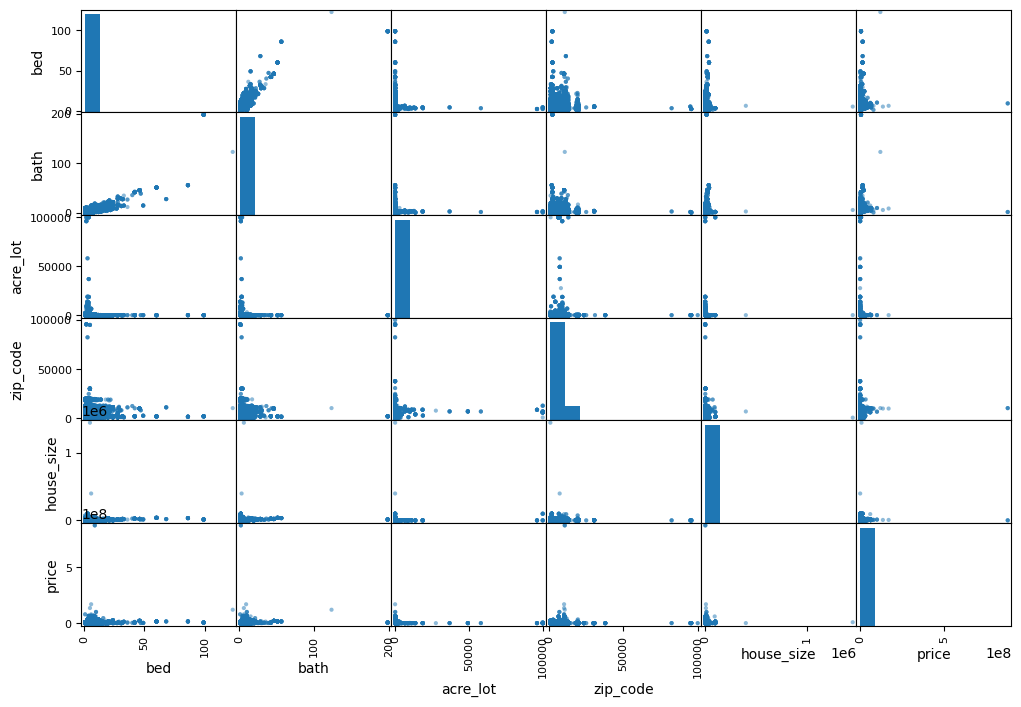

In [48]:
from pandas.plotting import scatter_matrix
scatter_matrix(housing[attributes], figsize=(12, 8))

Deal with Nulls:
<br>Bed and Bath: Drop for now (Come back and use house size to determine if a house was sold?)


In [340]:
from sklearn.preprocessing import OneHotEncoder


def prepare_data(data):
    data = data.dropna(subset=['bed','bath'])
    data = data[data["acre_lot"] <20000]
    data = data.dropna(subset=["house_size"])
    data = data.drop("status",axis=1)
    data = data.drop("city",axis=1)
    data = data.dropna(subset=["state"])
    #data = data.drop("state",axis=1)
    data = data.drop("prev_sold_date",axis=1)
    data = data.drop("zip_code",axis=1)
    
    
    
    return data
    

In [341]:
def ApplyOneHotEncoder(data,feature):
    
#one hot encode zip_code
    encoder = OneHotEncoder(sparse=False,handle_unknown='ignore')
    encoded_data = encoder.fit_transform(data[[feature]])
    

    encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out([feature]))
    
    data = pd.concat([data.reset_index(drop=True), encoded_df.reset_index(drop=True)], axis=1)

    #data = pd.concat([data, encoded_df], axis=1)
    #print(data)
    data = data.drop(feature, axis=1)
    
    return(data)
    


Going to remove all values ~20000 acre size

<br>house size: Going to drop records without house size


In [171]:
housing

,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price
65863,for_sale,5.0,5.0,1.46,Great Barrington,Massachusetts,1230.0,3808.0,NaN,829000.0
708158,for_sale,1.0,1.0,0.01,Lakewood,New Jersey,8701.0,900.0,2018-05-31,137000.0
822092,for_sale,6.0,3.0,0.04,Bronx,New York,10459.0,2632.0,2004-11-24,725000.0
119820,for_sale,2.0,2.0,0.22,Methuen,Massachusetts,1844.0,1548.0,NaN,425000.0
464014,for_sale,NaN,NaN,0.17,Bayonne,New Jersey,7002.0,NaN,NaN,649000.0
...,...,...,...,...,...,...,...,...,...,...
530642,for_sale,9.0,3.0,0.10,Paterson,New Jersey,7524.0,NaN,2010-09-07,495000.0
249693,for_sale,NaN,NaN,7.80,Windham,New Hampshire,3087.0,NaN,NaN,750000.0
774106,for_sale,1.0,1.0,NaN,Howard Beach,New York,11414.0,NaN,NaN,155900.0
272784,for_sale,NaN,NaN,0.41,Haverhill,New Hampshire,3785.0,NaN,NaN,15500.0


In [342]:
prepared_data = prepare_data(housing)
prepared_data = ApplyOneHotEncoder(prepared_data,'state')
#prepared_data

C:\ML\env\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [343]:

prepared_train_x = prepared_data.drop("price",axis=1)
prepared_train_y = prepared_data["price"]

xnan_count = prepared_train_x.isna().sum()
xnan_count

bed               0
bath              0
acre_lot          0
house_size        0
state_New York    0
dtype: int64

In [344]:
prepared_train_y

0          645000.0
1        11950000.0
2         2590000.0
3          623000.0
4          934999.0
            ...    
35653    11995000.0
35654     2495000.0
35655      599987.0
35656      999999.0
35657      660000.0
Name: price, Length: 35658, dtype: float64

In [345]:
ynan_count = prepared_train_y.isna().sum()
ynan_count

0

Evaluate x_train for normalization

In [346]:
prepared_train_x.describe()

,bed,bath,acre_lot,house_size,state_New York
count,35658.000000,35658.000000,35658.000000,35658.000000,35658.0
mean,4.070924,2.950726,3.404521,2299.353665,1.0
std,2.282215,1.742764,96.835684,1877.313974,0.0
min,1.000000,1.000000,0.000000,122.000000,1.0
25%,3.000000,2.000000,0.050000,1308.000000,1.0
50%,4.000000,3.000000,0.070000,1900.000000,1.0
75%,5.000000,4.000000,0.180000,2720.000000,1.0
max,42.000000,43.000000,6680.000000,40720.000000,1.0


In [347]:
housing_test = test_set.copy()
prepared_test_data = prepare_data(housing_test)
prepared_test_data = ApplyOneHotEncoder(prepared_test_data,'state')



C:\ML\env\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [348]:
prepared_test_x = prepared_test_data.drop("price",axis=1)
prepared_test_y = prepared_test_data["price"]

In [349]:
from sklearn.preprocessing import MinMaxScaler

# Define the features to normalize
features_to_normalize = ["acre_lot", "house_size","bed","bath"]

# Initialize the Min-Max scaler
scaler = MinMaxScaler()

# Fit the scaler on the training data and transform it
prepared_train_x[features_to_normalize] = scaler.fit_transform(prepared_train_x[features_to_normalize])

# Transform the test data using the same scaler
prepared_test_x[features_to_normalize] = scaler.transform(prepared_test_x[features_to_normalize])

In [350]:
prepared_train_x.describe()
prepared_train_x.head()

,bed,bath,acre_lot,house_size,state_New York
0,0.000000,0.000000,0.000034,0.014089,1.0
1,0.048780,0.071429,0.000513,0.051653,1.0
2,0.414634,0.119048,0.000010,0.135598,1.0
3,0.024390,0.023810,0.000007,0.020568,1.0
4,0.170732,0.047619,0.000006,0.079610,1.0


<br>Prev_sold_date (Time series? For now I'll drop but, I may add back in as boolean)

In [351]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(prepared_train_x,prepared_train_y)

LinearRegression()

In [352]:
predictions = lin_reg.predict(prepared_test_x)
predictions



array([1333839.57074849,  485715.32929458,  465953.35252044, ...,
         78245.40054265,  691255.307765  , 2690226.22010238])

In [358]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mae = mean_absolute_error(prepared_test_y, predictions)
print('mean_squared_error : ', mean_squared_error(prepared_test_y, predictions, squared = False))
print('mean_absolute_error : ', mae)
mean_target = prepared_test_y.mean()
mae_percentage = (mae / mean_target) * 100
print('mean_absolute_error as a percentage: {:.2f}%'.format(mae_percentage))


mean_squared_error :  2794430.341481883
mean_absolute_error :  1002413.78288742
mean_absolute_error as a percentage: 64.99%


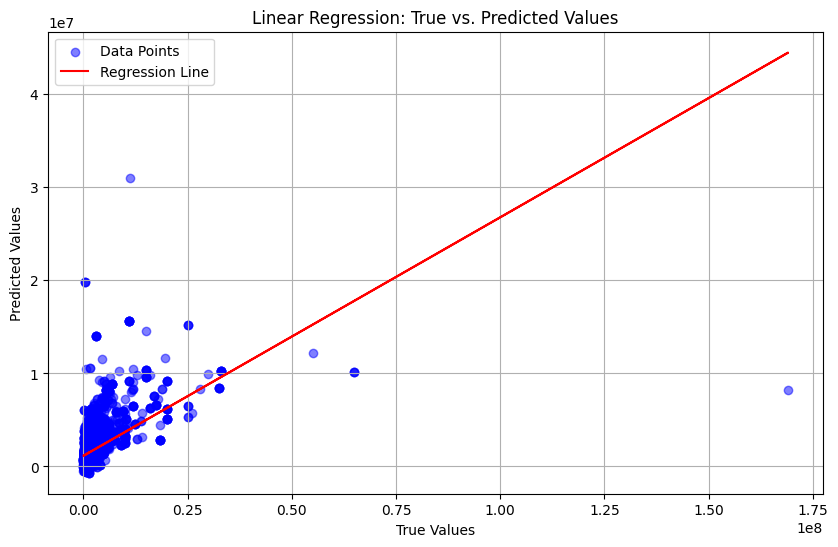

In [354]:
import numpy as np
import matplotlib.pyplot as plt

# Scatter plot of true values vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(prepared_test_y, predictions, c='blue', alpha=0.5, label='Data Points')
plt.title('Linear Regression: True vs. Predicted Values')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')

# Add a regression line
regression_line = np.polyfit(prepared_test_y, predictions, 1)
plt.plot(prepared_test_y, np.polyval(regression_line, prepared_test_y), color='red', label='Regression Line')

plt.legend()
plt.grid(True)
plt.show()

ValueError: x and y must be the same size

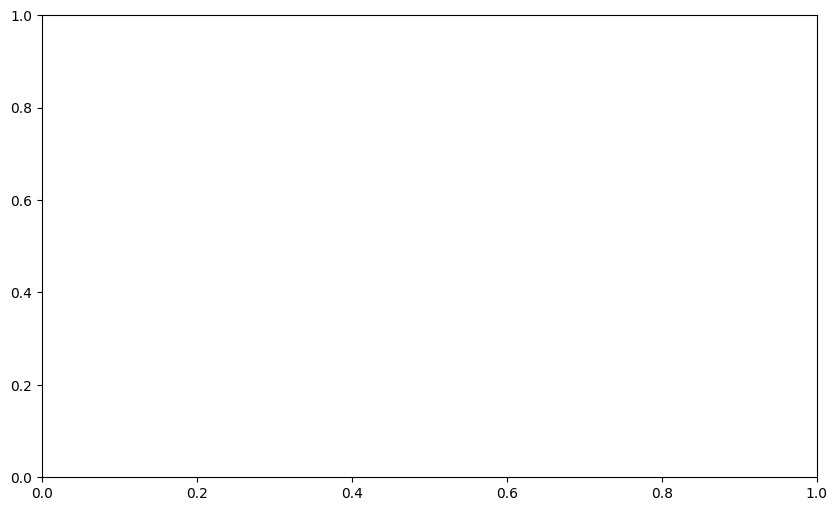

In [355]:
import numpy as np
import matplotlib.pyplot as plt

# Sample data


# Create a scatter plot for Y1
plt.figure(figsize=(10, 6))
plt.scatter(prepared_test_x, predictions, c='blue', alpha=0.5, label='Prediction')
plt.title('Scatter Plot with Regression Lines')
plt.xlabel('X')
plt.ylabel('Y^')

# Add a regression line for Y1
regression_line = np.polyfit(prepared_test_y, predictions, 1)
plt.plot(prepared_test_y, np.polyval(regression_line, prepared_test_y), color='red', label='Regression Line')

# Create a scatter plot for Y2
plt.scatter(prepared_test_x, prepared_test_y, c='green', alpha=0.5, label='Actual')


plt.legend()
plt.grid(True)
plt.show()